In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/AAPL-week2.csv')
data

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/21,1,1,0,1
1,2018/5/28,1,1,1,0
2,2018/6/4,0,1,1,1
3,2018/6/11,0,0,1,1
4,2018/6/18,1,0,0,1
...,...,...,...,...,...
253,2023/3/27,0,1,1,1
254,2023/4/3,1,0,1,1
255,2023/4/10,0,1,0,1
256,2023/4/17,1,0,1,0


In [ ]:
data=data['Close']
data

0      1
1      1
2      0
3      0
4      1
      ..
253    0
254    1
255    0
256    1
257    0
Name: Close, Length: 258, dtype: int64

In [ ]:
split =int(0.8*data.shape[0])
Train,Test = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val = Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [ ]:
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set = Train.values.reshape(-1,1)
val_set = Val.values.reshape(-1,1)
test_set = Test.values.reshape(-1,1)

In [ ]:
train_set.shape,val_set.shape,test_set.shape

((164, 1), (42, 1), (52, 1))

In [ ]:
#Preparation for time-series data 抓過去的3筆資料
X_train = [] 
y_train = []
for i in range(3,len(train_set)):
    X_train.append(train_set[i-3:i]) 
    y_train.append(train_set[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = [] 
y_val = []
for i in range(3,len(val_set)):
    X_val.append(val_set[i-3:i]) 
    y_val.append(val_set[i]) 
X_val, y_val = np.array(X_val), np.array(y_val) 
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(3,len(test_set)):
    X_test.append(test_set[i-3:i]) 
    y_test.append(test_set[i])
X_test, y_test = np.array(X_test), np.array(y_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape

(161, 3, 1)

In [ ]:
y_train.shape

(161, 1)

In [ ]:
X_val.shape

(39, 3, 1)

In [ ]:
y_val.shape

(39, 1)

In [ ]:
X_test.shape

(49, 3, 1)

In [ ]:
y_test.shape

(49, 1)

## **1.Sinple_RNN**

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

#Build & Compile model
keras.backend.clear_session()
model = Sequential()

model.add(SimpleRNN(units=6,return_sequences=True,input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(SimpleRNN(units=12,return_sequences=True,activation='relu'))
model.add(SimpleRNN(units=24,return_sequences=True,activation='linear'))
model.add(SimpleRNN(units=48,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))
model.add(SimpleRNN(units=96,return_sequences=False,activation='softmax'))
model.add(Dropout(0.4))
model.add(Dense(units=1))

opt=Adam(learning_rate=0.005,beta_1=0.95,beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 6)              48        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 12)             228       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 24)             888       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3, 48)             3504      
                                                                 
 dropout (Dropout)           (None, 3, 48)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 96)                13920     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0

## **2.LSTM**

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

#Build & Compile model
keras.backend.clear_session()
model = Sequential()

model.add(LSTM(units=6,return_sequences=True,input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(LSTM(units=12,return_sequences=True,activation='relu'))
model.add(LSTM(units=24,return_sequences=True,activation='linear'))
model.add(LSTM(units=48,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(units=96,return_sequences=False,activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(units=1))

opt=Adam(learning_rate=0.005,beta_1=0.95,beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 6)              192       
                                                                 
 lstm_1 (LSTM)               (None, 3, 12)             912       
                                                                 
 lstm_2 (LSTM)               (None, 3, 24)             3552      
                                                                 
 lstm_3 (LSTM)               (None, 3, 48)             14016     
                                                                 
 dropout (Dropout)           (None, 3, 48)             0         
                                                                 
 lstm_4 (LSTM)               (None, 96)                55680     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0

## **3.GRU**

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

#Build & Compile model
keras.backend.clear_session()
model = Sequential()

model.add(GRU(units=6,return_sequences=True,input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(GRU(units=12,return_sequences=True,activation='relu'))
model.add(GRU(units=24,return_sequences=True,activation='linear'))
model.add(GRU(units=48,return_sequences=True,activation='relu'))
model.add(Dropout(0.4))
model.add(GRU(units=96,return_sequences=False,activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(units=1))

opt=Adam(learning_rate=0.005,beta_1=0.95,beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 6)              162       
                                                                 
 gru_1 (GRU)                 (None, 3, 12)             720       
                                                                 
 gru_2 (GRU)                 (None, 3, 24)             2736      
                                                                 
 gru_3 (GRU)                 (None, 3, 48)             10656     
                                                                 
 dropout (Dropout)           (None, 3, 48)             0         
                                                                 
 gru_4 (GRU)                 (None, 96)                42048     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0

In [ ]:
# batch size = 64,96,128
history = model.fit(X_train, y_train, epochs = 100, batch_size=96,validation_data=(X_val,y_val))

Epoch 1/100
2/2 [==============================] - 8s 971ms/step - loss: 6.1358 - accuracy: 0.3851 - val_loss: 1.7564 - val_accuracy: 0.5128
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 2.2252 - accuracy: 0.3851 - val_loss: 1.3274 - val_accuracy: 0.5128
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 1.6093 - accuracy: 0.3851 - val_loss: 1.0791 - val_accuracy: 0.5128
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 1.3081 - accuracy: 0.3851 - val_loss: 0.9262 - val_accuracy: 0.5128
Epoch 5/100
2/2 [==============================] - 0s 51ms/step - loss: 1.1008 - accuracy: 0.3851 - val_loss: 0.8409 - val_accuracy: 0.5128
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 1.0291 - accuracy: 0.3851 - val_loss: 0.7907 - val_accuracy: 0.5128
Epoch 7/100
2/2 [==============================] - 0s 67ms/step - loss: 0.9431 - accuracy: 0.3913 - val_loss: 0.7614 - val_accuracy: 0.5128
Epoch 8/100
2/2 [==

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

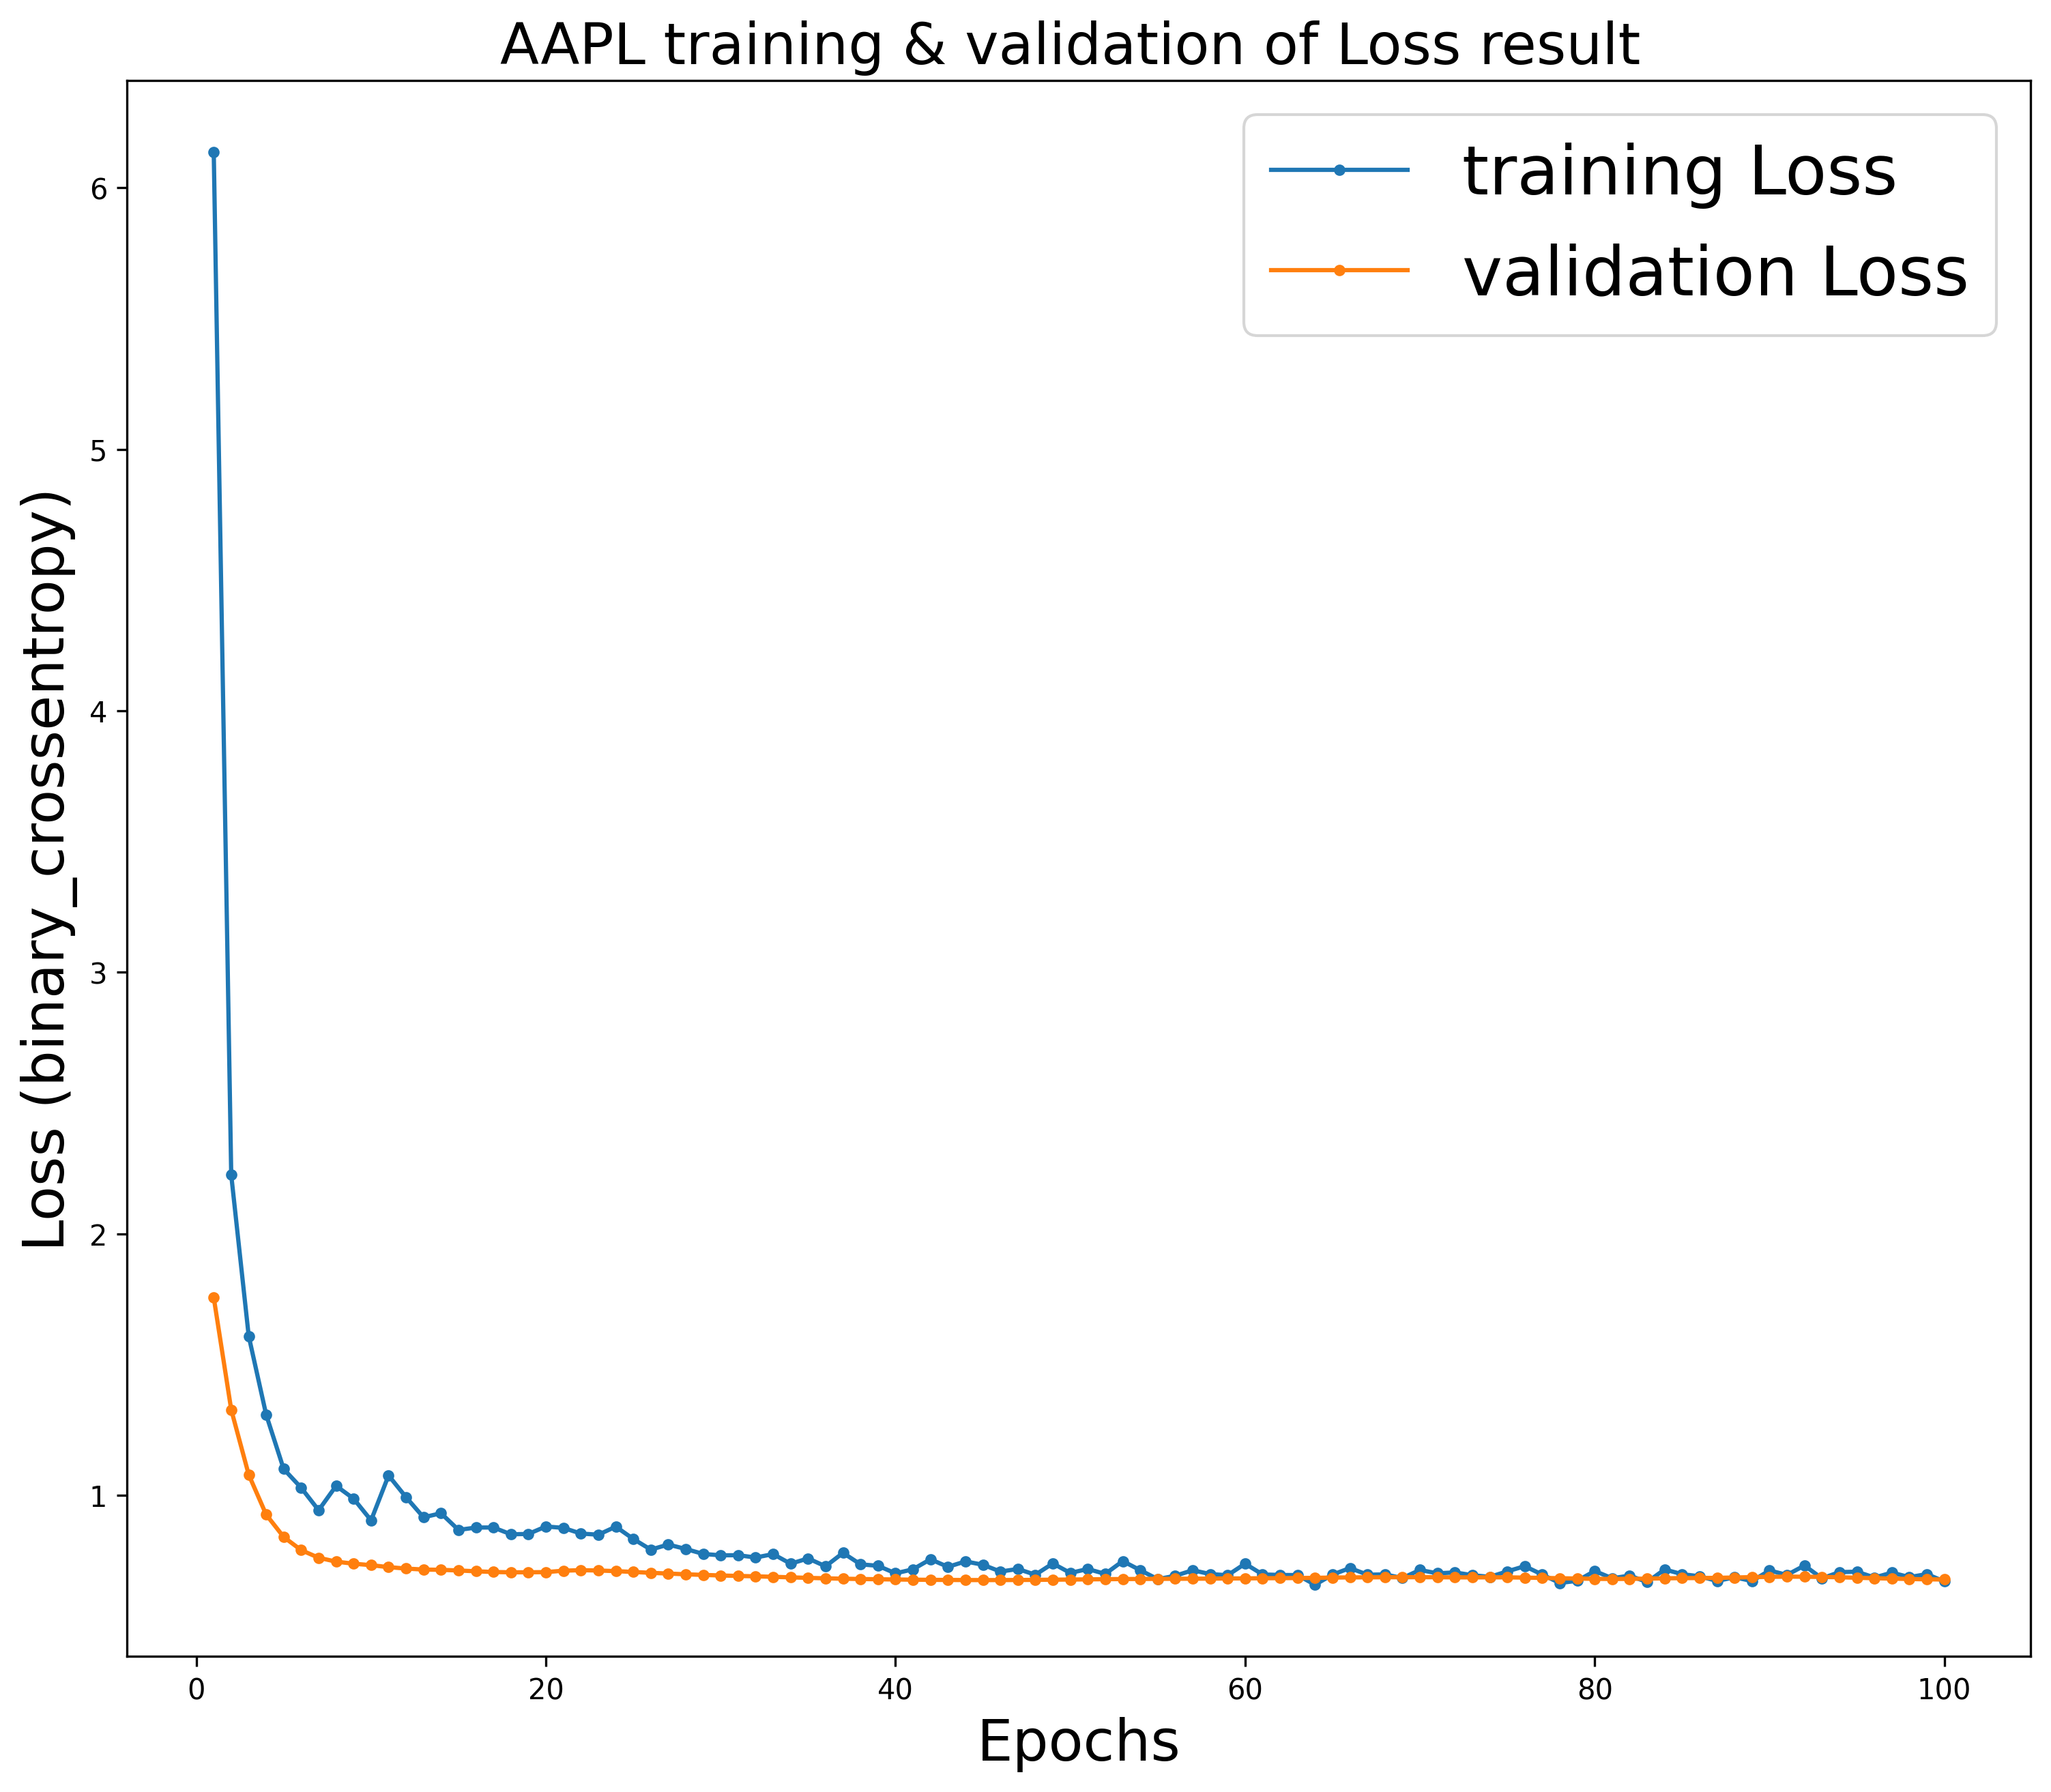

In [ ]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (binary_crossentropy)',fontsize=20)
plt.title('AAPL training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

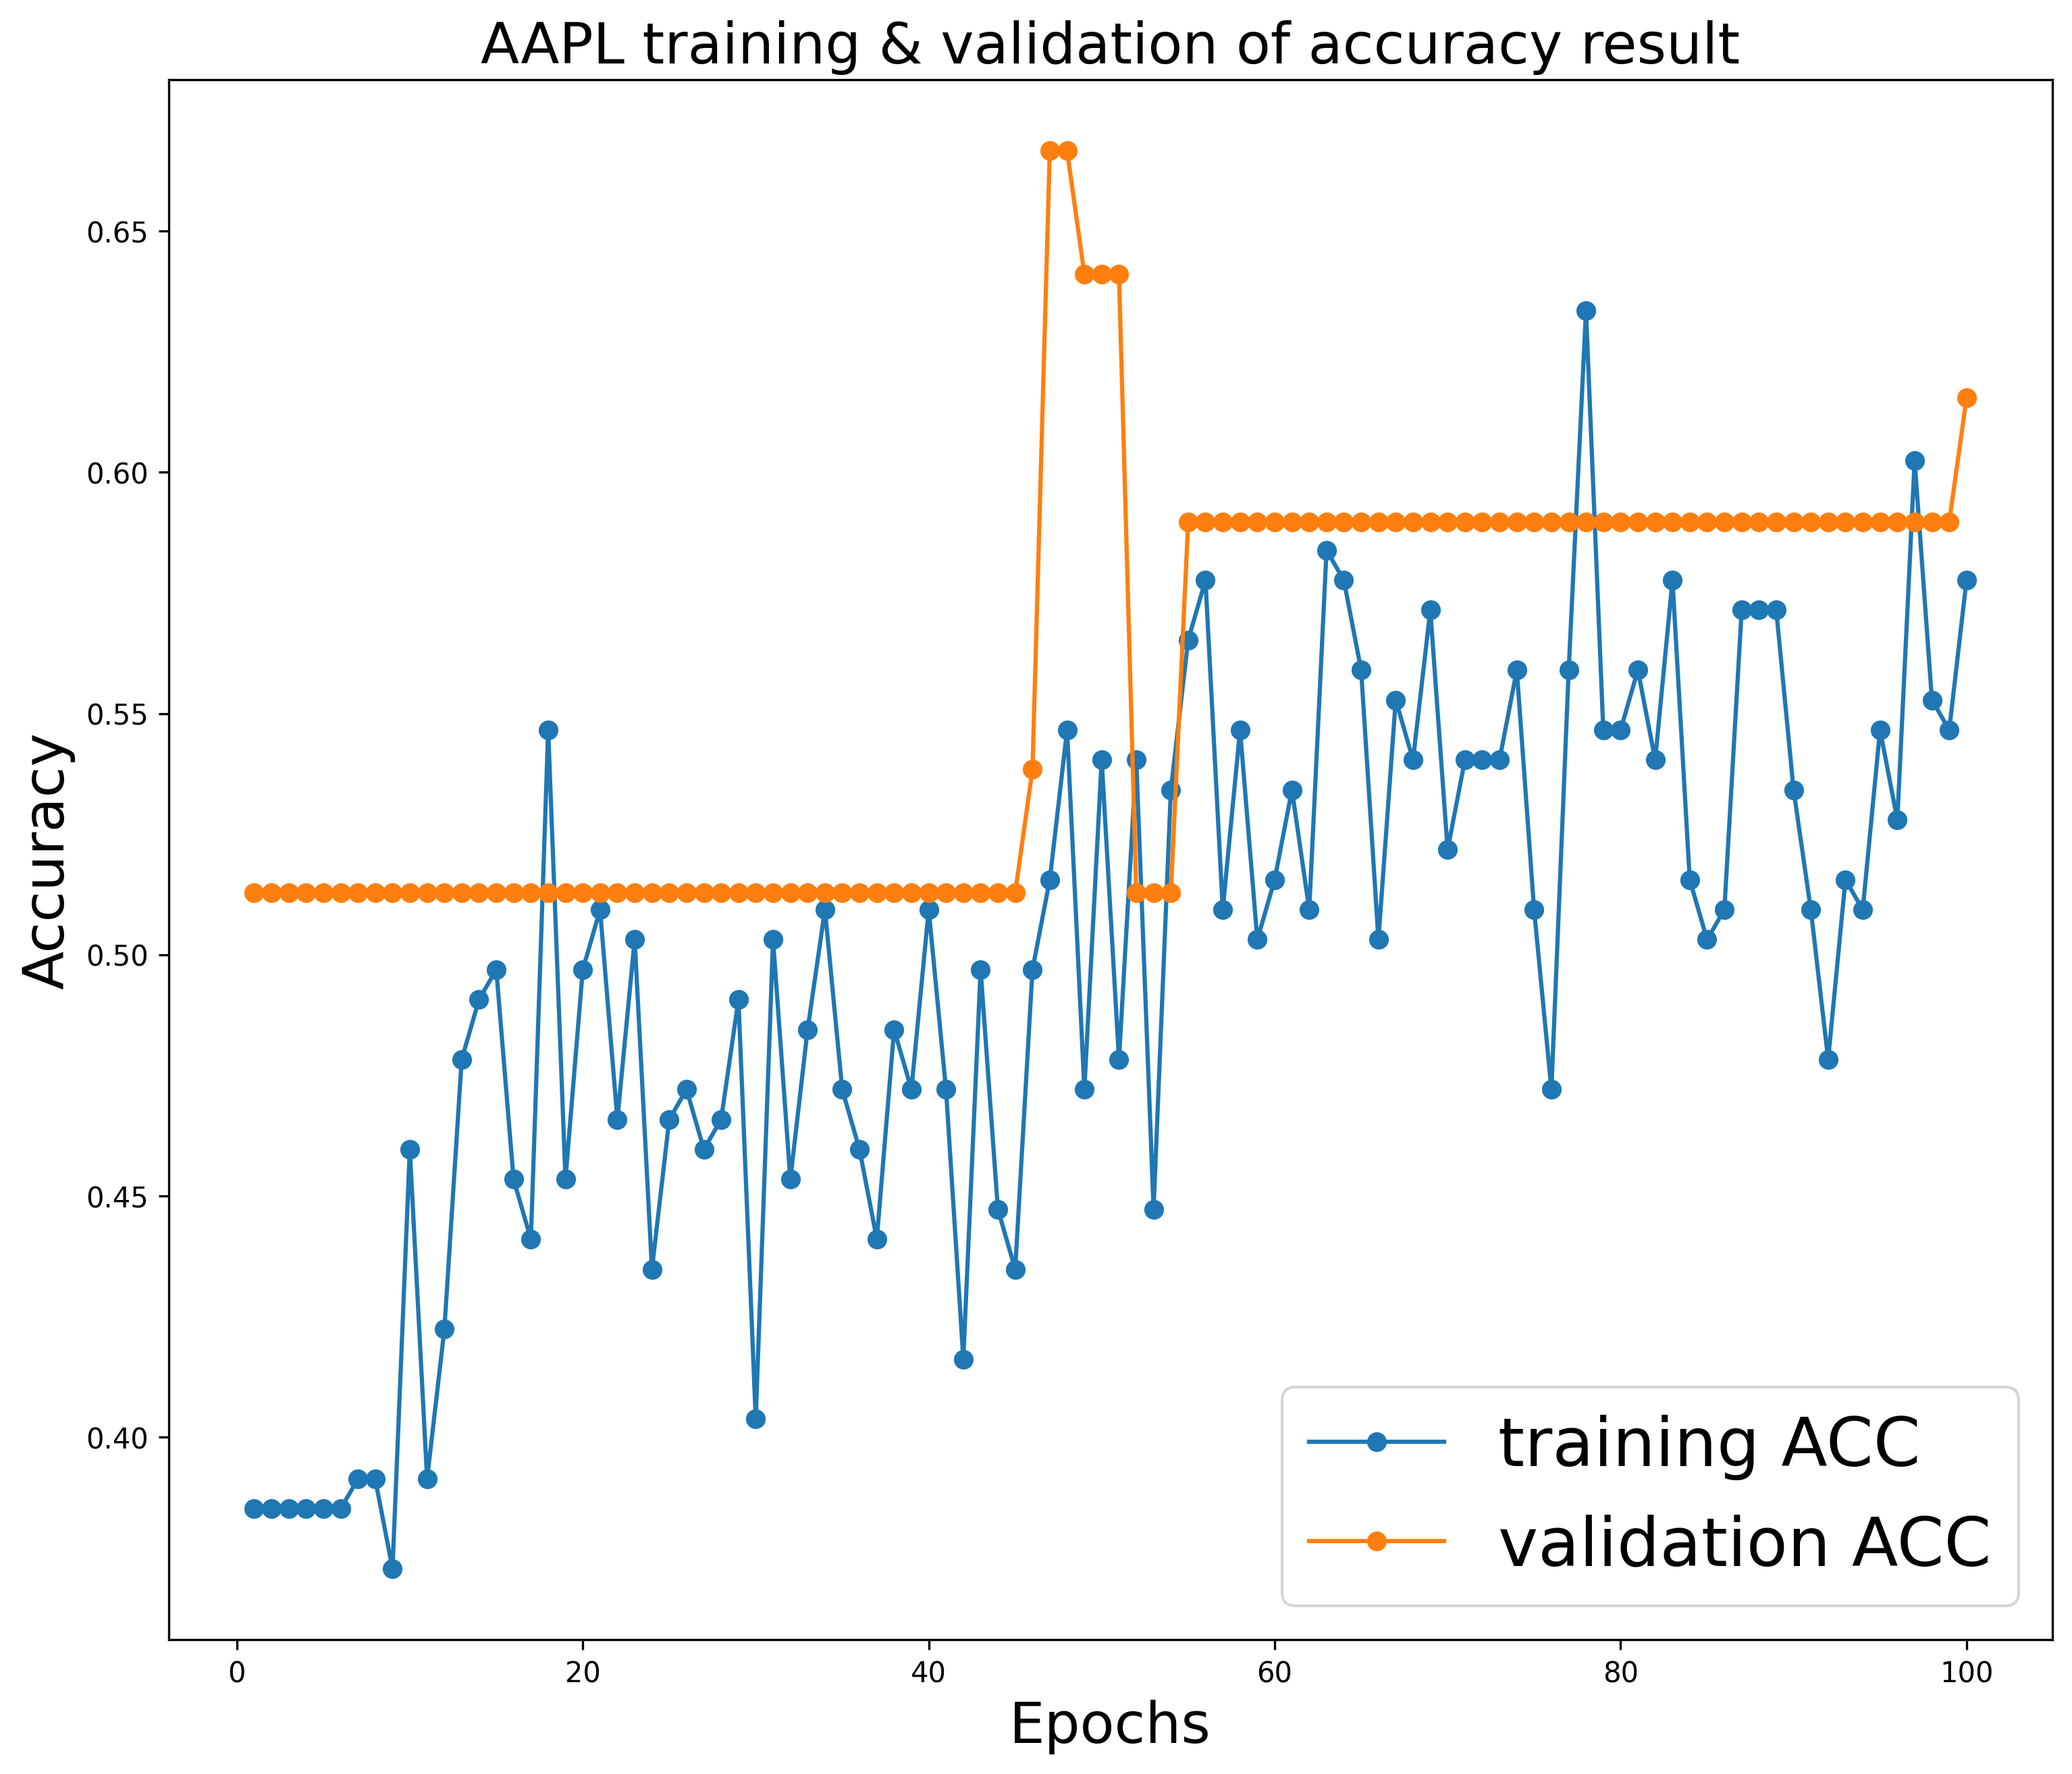

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('AAPL training & validation of accuracy result',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
model.predict(X_test)

2/2 [==============================] - 3s 9ms/step


array([[0.48828968],
       [0.532601  ],
       [0.49910653],
       [0.41739064],
       [0.48828968],
       [0.532601  ],
       [0.5413766 ],
       [0.5608253 ],
       [0.5665684 ],
       [0.5665684 ],
       [0.5665684 ],
       [0.5665684 ],
       [0.5383915 ],
       [0.49910653],
       [0.41739064],
       [0.48828968],
       [0.532601  ],
       [0.49910653],
       [0.41739064],
       [0.48828968],
       [0.532601  ],
       [0.5413766 ],
       [0.5608253 ],
       [0.5383915 ],
       [0.5413766 ],
       [0.5608253 ],
       [0.5383915 ],
       [0.49910653],
       [0.41739064],
       [0.41739064],
       [0.41739064],
       [0.41739064],
       [0.41739064],
       [0.48828968],
       [0.5608253 ],
       [0.5665684 ],
       [0.5665684 ],
       [0.5383915 ],
       [0.5413766 ],
       [0.532601  ],
       [0.5413766 ],
       [0.532601  ],
       [0.5413766 ],
       [0.5608253 ],
       [0.5665684 ],
       [0.5383915 ],
       [0.5413766 ],
       [0.532

In [ ]:
predicted_price = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
actual_price = y_test

In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

In [ ]:
model.save('AAPL-week2.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
ANN_model=keras.models.load_model('AAPL-week2.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
#Transform the predictions to 0 and 1 
predicted_price = (model.predict(X_test) >= 0.5).astype('int')
predicted_price

2/2 [==============================] - 0s 8ms/step


array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(actual_price,predicted_price)
testing_f1s=f1_score(actual_price,predicted_price,pos_label=1)
testing_pre=precision_score(actual_price,predicted_price,pos_label=1)
testing_sen=sensitivity_score(actual_price,predicted_price,pos_label=1)
testing_spe=specificity_score(actual_price,predicted_price,pos_label=1)
testing_cm=confusion_matrix(actual_price,predicted_price)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 63.27
Testing f1s: 67.86
Testing pre: 59.38
Testing sen: 79.17
Testing spe: 48.0

Testing confusion matrix:
[[12 13]
 [ 5 19]]


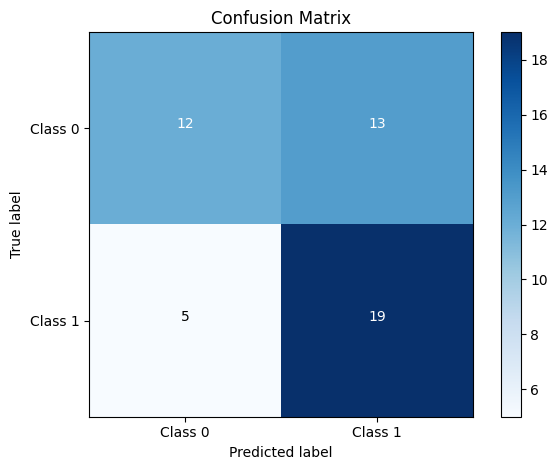

In [ ]:
cm = confusion_matrix(actual_price,predicted_price)

# 繪製混淆矩陣
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

# 在每個格子中顯示數字
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()